In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [14]:
!mkdir MNIST_data

mkdir: cannot create directory ‘MNIST_data’: File exists


In [0]:
import os, time, itertools, pickle
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
# hyperparameters
n_neurons = 128
learning_rate = 0.001
batch_size = 128
n_epochs = 10
# parameters
n_steps = 28 # 28 rows
n_inputs = 28 # 28 cols
n_outputs = 10 # 10 classes
# build a rnn model
X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.int32, [None])
cell = tf.nn.rnn_cell.BasicRNNCell(num_units=n_neurons)
output, state = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)
logits = tf.layers.dense(state, n_outputs)
cross_entropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
loss = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)
prediction = tf.nn.in_top_k(logits, y, 1)
accuracy = tf.reduce_mean(tf.cast(prediction, tf.float32))
predictions = tf.argmax(logits,1)

Instructions for updating:
This class is equivalent as tf.keras.layers.SimpleRNNCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Please use `layer.add_weight` method instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use keras.layers.Dense instead.
Instructions for updating:
Please use `layer.__call__` method instead.


In [4]:
# input data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/")
X_test = mnist.test.images # X_test shape: [num_test, 28*28]
X_test = X_test.reshape([-1, n_steps, n_inputs])
y_test = mnist.test.labels

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [5]:
# initialize the variables
init = tf.global_variables_initializer()
# train the model
with tf.Session() as sess:
    sess.run(init)
    n_batches = mnist.train.num_examples // batch_size
    for epoch in range(n_epochs):
        for batch in range(n_batches):
            X_train, y_train = mnist.train.next_batch(batch_size)
            X_train = X_train.reshape([-1, n_steps, n_inputs])
            sess.run(optimizer, feed_dict={X: X_train, y: y_train})
        loss_train, acc_train = sess.run(
            [loss, accuracy], feed_dict={X: X_train, y: y_train})
        print('Epoch: {}, Train Loss: {:.3f}, Train Acc: {:.3f}'.format(
            epoch + 1, loss_train, acc_train))
    predict = sess.run(
        predictions, feed_dict={X: X_test, y: y_test})
    #print('Test Loss: {:.3f}, Test Acc: {:.3f}'.format(loss_test, acc_test))
    

Epoch: 1, Train Loss: 0.292, Train Acc: 0.922
Epoch: 2, Train Loss: 0.134, Train Acc: 0.961
Epoch: 3, Train Loss: 0.113, Train Acc: 0.969
Epoch: 4, Train Loss: 0.092, Train Acc: 0.984
Epoch: 5, Train Loss: 0.059, Train Acc: 0.984
Epoch: 6, Train Loss: 0.025, Train Acc: 0.992
Epoch: 7, Train Loss: 0.041, Train Acc: 0.992
Epoch: 8, Train Loss: 0.109, Train Acc: 0.977
Epoch: 9, Train Loss: 0.025, Train Acc: 1.000
Epoch: 10, Train Loss: 0.096, Train Acc: 0.977


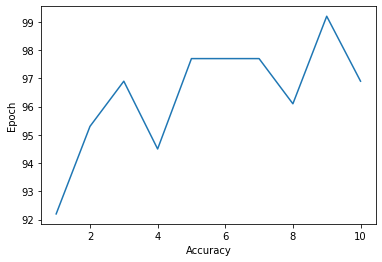

In [12]:
x = [1,2,3,4,5,6,7,8,9,10]
y = [92.2,95.3,96.9,94.5,97.7,97.7,97.7,96.1,99.2,96.9]
plt.ylabel('Epoch')
plt.xlabel('Accuracy')
plt.plot(x,y)

The predicted label of index 0 is:
7
The actual label of index 0 is: 
7


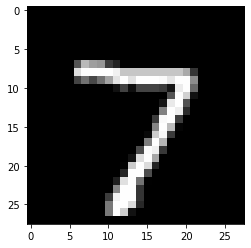

(28, 28)


In [6]:
print("The predicted label of index 0 is:")
print(predict[0])
print("The actual label of index 0 is: ")
print(mnist.test.labels[0])
first_image = mnist.test.images[0]
first_image = np.array(first_image, dtype='float')
pixels = first_image.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()
print(pixels.shape)